In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("Student_performance_data .csv")

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [8]:
def CorrPlot(df, dropDuplicates = True, figsize = (8, 6)):
    # df = df.corr()
    df = np.abs(df.corr())
    # Exclude duplicate correlations by masking upper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                    annot=True,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .75}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                annot=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

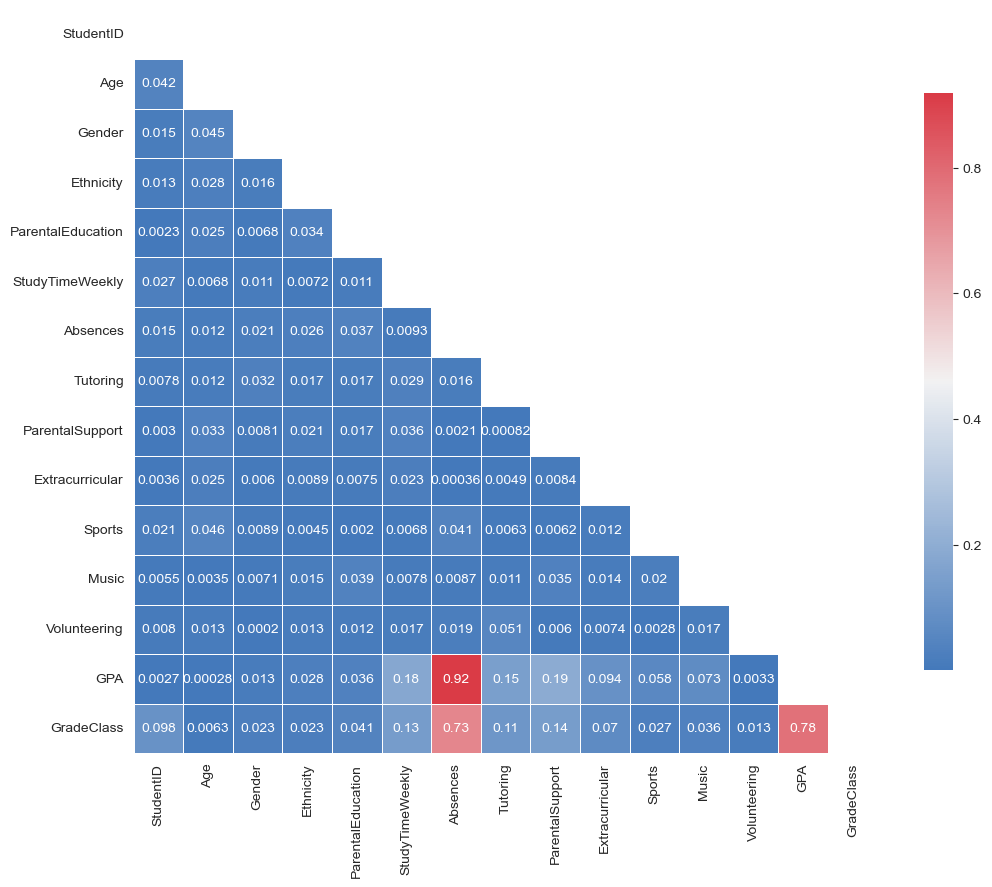

In [9]:
CorrPlot(df, figsize = (12, 10))

In [ ]:
#lists input variables
all_vars = df.columns
outputvar_name = 'GradeClass'
inputvar_names = all_vars.drop(outputvar_name).tolist()

df_inputs = df[inputvar_names]
df_output = df[outputvar_name]

print(f'there are {len(inputvar_names)} Input variables')
df_inputs


there are 14 Input variables


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


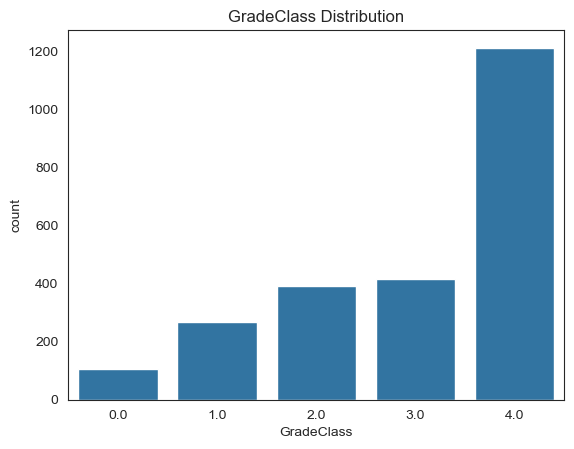

In [ ]:
#plots gradeClass
sns.countplot(x='GradeClass', data=df)
plt.title('GradeClass Distribution')
plt.show()

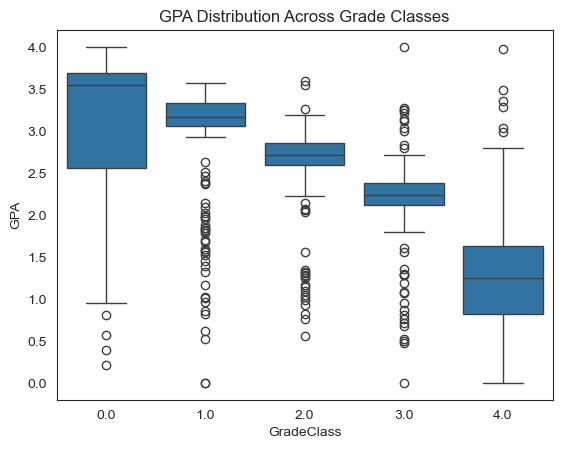

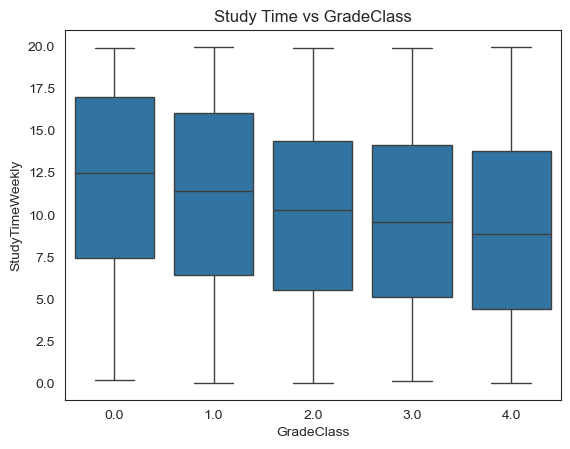

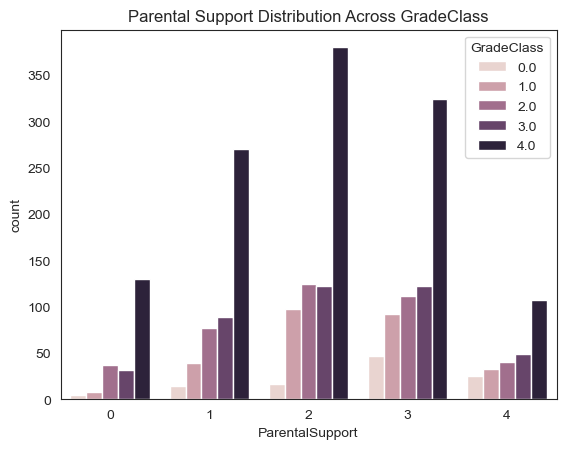

In [11]:
# Boxplot of GPA across GradeClass
sns.boxplot(x='GradeClass', y='GPA', data=df)
plt.title("GPA Distribution Across Grade Classes")
plt.show()

# Barplot: StudyTimeWeekly vs GradeClass
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("Study Time vs GradeClass")
plt.show()

# Countplot: Parental Support vs GradeClass
sns.countplot(x='ParentalSupport', hue='GradeClass', data=df)
plt.title("Parental Support Distribution Across GradeClass")
plt.show()

In [ ]:
#drops not needed columns
df_cleaned = df.drop(columns=[
    'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
    'Extracurricular', 'Music', 'Volunteering',
    'Sports', 'StudentID'
])


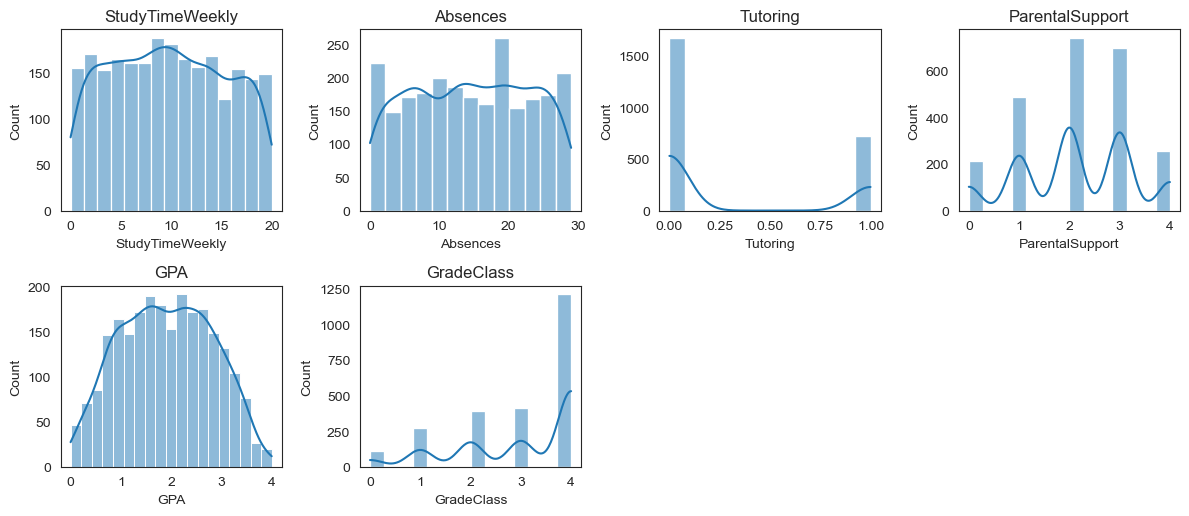

In [ ]:
#Displays all colums not dropped
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#splits data into imput and output variable for model training later
X = df_cleaned.drop(columns=['GradeClass', 'GPA'])
y = df_cleaned['GradeClass']



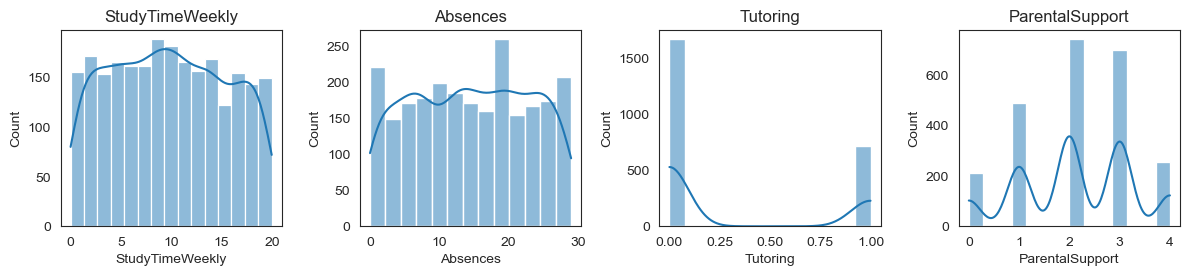

In [ ]:
#Creates a plot of input variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#copies the cleaned data to a new df for outlier treatments
df_tx = df_cleaned.copy()

In [ ]:
#outlier treatment
q1 = df_tx['GPA'].quantile(0.25)
q3 = df_tx['GPA'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df_tx = df_tx[(df_tx['GPA'] >= lower) & (df_tx['GPA'] <= upper)]

In [ ]:
#scaling features using standardscaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

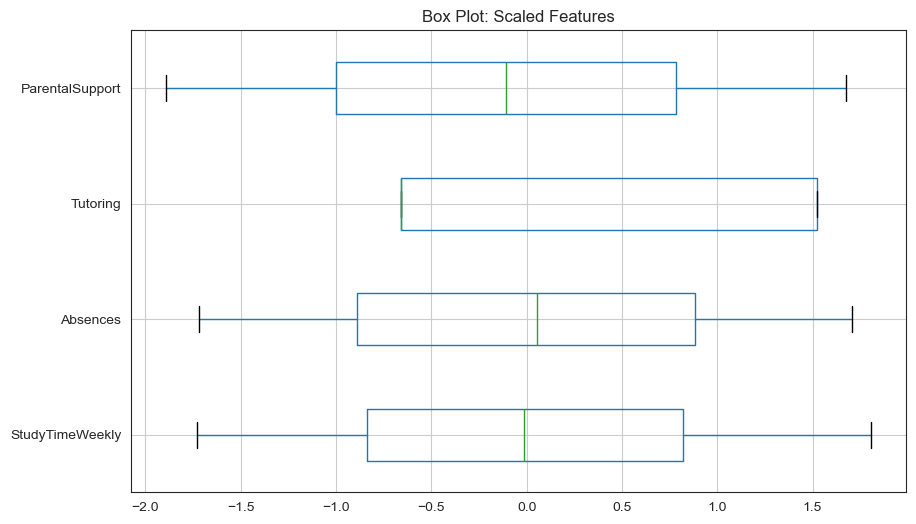

In [ ]:
#converts data to df
x_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
#displays scaled features
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = x_scaled_df.boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Scaled Features')

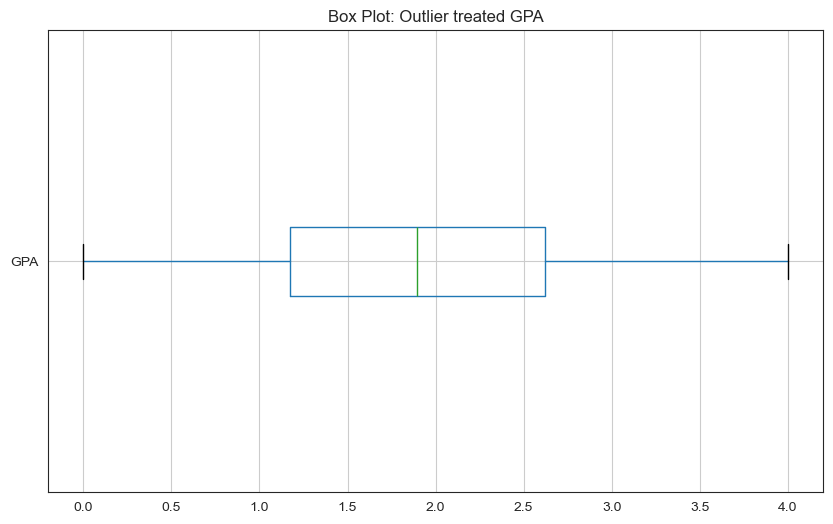

In [ ]:
#displays The GPA feature after being treated for outliers
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_tx.boxplot(column=['GPA'], vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Outlier treated GPA')